# Data Wrangling del MIAS dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importación de paquetes necesarios
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set_style("whitegrid")

#data_dir="../../../dataset/"
data_dir = "/content/drive/MyDrive/Implementación Proyecto Grado Maestría/all-mias Preprocesadas+HistEq"
data_orig_dir = "/content/drive/MyDrive/Implementación Proyecto Grado Maestría/all-mias"

In [ ]:
# Read csv file containing training datadata
all_cases_df = pd.read_csv(os.path.join(data_dir, "Info.txt"), delim_whitespace=True)
# Print first 5 rows
print(f'There are {all_cases_df.shape[0]} rows and {all_cases_df.shape[1]} columns in this data frame')
all_cases_df.head(10)

There are 330 rows and 7 columns in this data frame


,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
5,mdb005,F,CIRC,B,500.0,168.0,26.0
6,mdb006,F,NORM,NaN,NaN,NaN,NaN
7,mdb007,G,NORM,NaN,NaN,NaN,NaN
8,mdb008,G,NORM,NaN,NaN,NaN,NaN
9,mdb009,F,NORM,NaN,NaN,NaN,NaN


### Tipos de datos y detección de valores nulos
A continuación se exploran los de tipos de datos presentes en cada columna y si existen valores nulos en los datos.

In [ ]:
#A continuación se exploran los de tipos de datos presentes en cada columna y si existen valores nulos en los datos.
all_cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REFNUM    330 non-null    object 
 1   BG        330 non-null    object 
 2   CLASS     330 non-null    object 
 3   SEVERITY  123 non-null    object 
 4   X         119 non-null    float64
 5   Y         119 non-null    float64
 6   RADIUS    119 non-null    float64
dtypes: float64(3), object(4)
memory usage: 18.2+ KB


## Comprobación de números de referencia de mamografías

La cantidad de imágenes suministradas en el mias-dataset es de 322. En la columna "REFNUM" están presentes los números de identificación de cada mamografía, aunque algunas aparecen más de una vez en el dataframe debido a que cada mamografía puede tener más de una patología. A continuación se cuenta el total de filas en el dataset, es decir, de patologías encontradas o no en el total de mamografías.

In [ ]:
print(f"El total de diagnósticos suministrados en el dataset es: {all_cases_df['REFNUM'].count()}")

El total de diagnósticos suministrados en el dataset es: 330


## Limpiar columnas repetidas

Algunas mamografías tienen múltiples anormalidades, quitaremos las duplicadas y mantendremos una fila por imagen.

In [ ]:
all_cases_df.drop_duplicates(subset=['REFNUM'], keep='first', inplace=True)

# reindex 
all_cases_df.reset_index(inplace=True)
all_cases_df.shape

(322, 8)

## Porcentajes por forma de anormalidad

In [ ]:
all_cases_df['CLASS'].value_counts(normalize=False)

NORM    207
CALC     25
CIRC     23
SPIC     19
ARCH     19
ASYM     15
MISC     14
Name: CLASS, dtype: int64

## Porcentajes por tipo de anormalidad (Benigna o Maligna)

In [ ]:
all_cases_df['SEVERITY'].value_counts(normalize=True)

B    0.556522
M    0.443478
Name: SEVERITY, dtype: float64

# Radios de las ROI entregadas en mamografías anormales
Histograma para observar los tamaños de los radios del total de mamografías señaladas como anormales

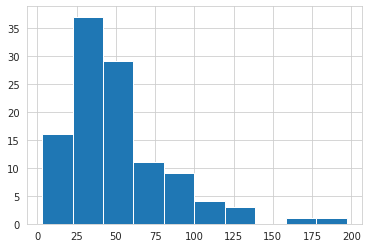

In [ ]:
radius = all_cases_df.RADIUS
radius.dropna(inplace=True)
plt.hist(radius)
plt.show()

## Radios por 'SEVERITY'

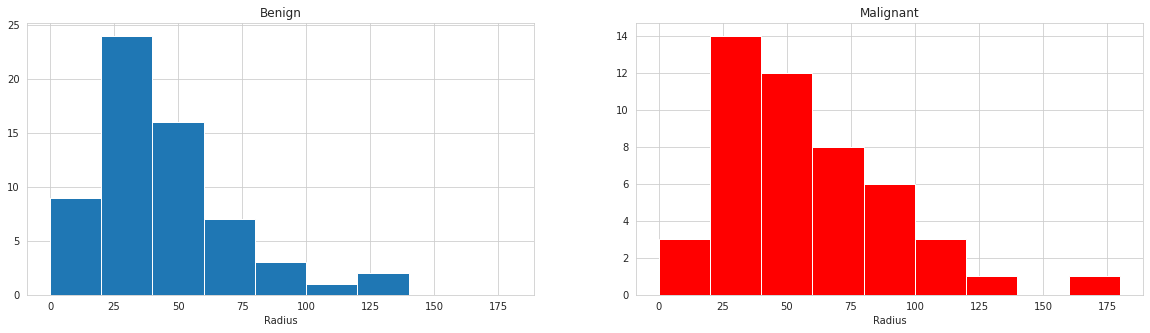

In [ ]:
## Look at radii by severity
sev_radius = all_cases_df.loc[:,['RADIUS','SEVERITY']]
sev_radius.dropna(axis=0, how='any', inplace=True)
benign = sev_radius[sev_radius.SEVERITY == 'B']
malignant = sev_radius[sev_radius.SEVERITY == 'M']
f, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].hist(benign.RADIUS, bins=range(0,200,20))
ax[0].set_xlabel("Radius")
ax[0].set_title("Benign")
ax[1].hist(malignant.RADIUS, color="red",  bins=range(0,200,20))
ax[1].set_title("Malignant")
ax[1].set_xlabel("Radius")
plt.show()

In [ ]:
## Estadísticas del radio de las ROI de las anormalidades:

print("Media de los radios:",np.mean(radius))
print("Mediana de los radios:",np.median(radius))
print("Radio mínimo:",np.min(radius))
print("Radio máximo:",np.max(radius))

Media de los radios: 50.57657657657658
Mediana de los radios: 43.0
Radio mínimo: 3.0
Radio máximo: 197.0


### Explore data labels
Run the next two code cells to create a list of the names of each patient condition or disease. 

In [ ]:
columns = all_cases_df.keys()
columns = list(columns)
print(columns)

['index', 'REFNUM', 'BG', 'CLASS', 'SEVERITY', 'X', 'Y', 'RADIUS']


mdb239_output.png


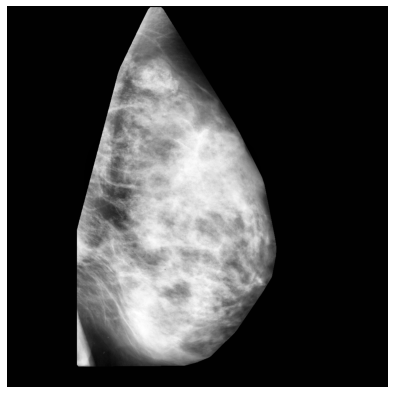

In [ ]:
import random
random_filename = random.choice([
    x for x in os.listdir(data_dir)
    if os.path.isfile(os.path.join(data_dir, x)) and
    x.endswith('.png')
])
print(random_filename)

random_image = cv2.imread(os.path.join(data_dir, random_filename), 0)

fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
plt.imshow(random_image, cmap='gray'), plt.axis("off")
plt.show()

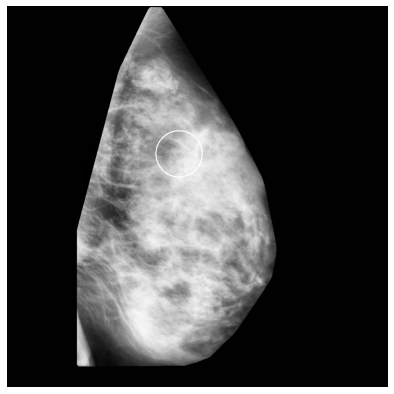

(1024, 1024)


In [ ]:
#mdb025 F CIRC B 674 443 79
#mdb231 F CALC M 603 538 44
#mdb171 D ARCH M 462 627 62

# Line thickness of 2 px 
thickness = 2

# Red color in BGR
color = (255, 255, 255)

# Center coordinates
x_coordinate = 462
y_coordinate = 627
y_coordinate = 1024-y_coordinate
center_coordinates = (x_coordinate, y_coordinate)

# Radius of circle
radius = 62
  
# Using cv2.circle() method
# Draw a circle of red color of thickness -1 px
marked_image = cv2.circle(random_image, center_coordinates, radius, color, thickness)

fig, (ax1) = plt.subplots(1, 1, figsize=(7,7))
plt.imshow(marked_image, cmap='gray'), plt.axis("off")

plt.show()

print( random_image.shape )

In [ ]:
# # your images
# images = [] 

# files = glob.glob (data_dir+'/'+"*.png")
# for myFile in files:
#     print(myFile)
#     image = cv2.imread(os.path.join(data_dir, myFile), 0)
#     images.append (image)

# print('X_data shape:', np.array(images).shape)

# all_cases_df['IMAGE'] = images
# #print(files)


In [ ]:
all_cases_df.shape
all_cases_df.head(10)

Run the next cell to print out the number of positive labels (1's) for each condition

In [ ]:
# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {all_cases_df[column].sum()} samples")

Have a look at the counts for the labels in each class above. Does this look like a balanced dataset?

### Data Visualization
Using the image names listed in the csv file, you can retrieve the image associated with each row of data in your dataframe. 

Run the cell below to visualize a random selection of images from the dataset.

In [ ]:
# Extract numpy values from Image column in data frame
images = all_cases_df['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = data_dir#+'/nih/images-small/'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(12,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()    

### Investigate a single image
Run the cell below to look at the first image in the dataset and print out some details of the image contents.

In [ ]:
# Get the first image that was listed in the train_df dataframe
sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

### Investigate pixel value distribution
Run the cell below to plot up the distribution of pixel values in the image shown above. 

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(raw_image.ravel(), kde=False)

plt.subplot(122)
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=True)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image', fontsize=14)
plt.xlabel('Pixel Intensity', fontsize=14)
plt.ylabel('# Pixels in Image', fontsize=14)

<a name="image-processing"></a>

# Image Preprocessing in Keras

Before training, you'll first modify your images to be better suited for training a convolutional neural network. For this task you'll use the Keras [ImageDataGenerator](https://keras.io/preprocessing/image/) function to perform data preprocessing and data augmentation.

Run the next two cells to import this function and create an image generator for preprocessing.

In [ ]:
# Import data generator from keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

### Standardization

The `image_generator` you created above will act to adjust your image data such that the new mean of the data will be zero, and the standard deviation of the data will be 1.  

In other words, the generator will replace each pixel value in the image with a new value calculated by subtracting the mean and dividing by the standard deviation.

$$\frac{x_i - \mu}{\sigma}$$

Run the next cell to pre-process your data using the `image_generator`. In this step you will also be reducing the image size down to 320x320 pixels.

In [ ]:
# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory=data_dir+"/nih/images-small/",
        x_col="Image", # features
        y_col= ['Mass'], # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Run the next cell to plot up an example of a pre-processed image

In [ ]:
# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(0)

plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Run the cell below to see a comparison of the distribution of pixel values in the new pre-processed image versus the raw image. 

In [ ]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')

## Data augmentation

In [ ]:
 def applyRandomRotation(self, image, rows, cols):
        """Applies a random rotation to the input image.
    
        The rotation angle is picked in a range from 1 to 360 degrees.
    
        Parameters
        ----------
        image : np.array
            The image to which the rotation will be applied.
        rows: int
            Width of the image
        cols: int
            Height of the image
        """
        
        rotationAngle = random.randint(1, 360)
        # Calculate the rotation matrix centered in cols/2,rows/2
        rotationMatrix = cv2.getRotationMatrix2D((cols/2,rows/2),
                                                 rotationAngle,1)
        # Apply the rotation
        rotatedImage = cv2.warpAffine(image,rotationMatrix,(cols,rows))
        return rotatedImage

In [ ]:
a = np.arange(10)
a = np.clip(a, 4, 5)
print(a)

[4 4 4 4 4 5 5 5 5 5]
